# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 126MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
import pandas as pd

# Загрузите данные из файла coins.csv
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [ ]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений

```
# Выбран кодовый формат

```
# Выбран кодовый формат
```


```


 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
un_coins = coins['name'].nunique()
print(un_coins)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
first_day = coins.index.min()
last_day = coins.index.max()
print(f'Данные с {first_day} по {last_day}.')

Данные с 2013-04-28 по 2018-06-06.


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
import pandas as pd
skip_is = coins.isnull().values.any()
if (skip_is):
  print("Пропуски в данных есть:")
  for coin in coins:
    if coins[coin].isnull().values.any():
      print(f'{coin}')
else:
  print("Пропуски отсутствуют.")

print("Пропуски в данных присутствуют из-за недостатка информации о цене монет,")
print("количестве транзакций в сети определенной монеты, объеме монет переведенных между адресами в сети данной монеты,")
print("количестве адресов совершавших в данный день транзации в сети данной монеты. Вызваны скорее всего тем, что некотрые валюты не популярны и по ним просто нет информации или они приватны.")

Пропуски в данных есть:
price
txCount
txVolume
activeAddresses
Пропуски в данных присутствуют из-за недостатка информации о цене монет,
количестве транзакций в сети определенной монеты, объеме монет переведенных между адресами в сети данной монеты,
количестве адресов совершавших в данный день транзации в сети данной монеты. Вызваны скорее всего тем, что эти валюты не популярны и по ним просто нет информации или они приватны.


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
import pandas as pd
max_name = coins[coins['price'] == coins['price'].max()]['name']
print(max_name)

date
2017-12-17    Bitcoin
Name: name, dtype: object


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

У Bitcoin самая высокая средняя капитализация равная 30782136351.01822.
У KingN Coin самая низкая средняя капитализация равная 41600.98431372549.


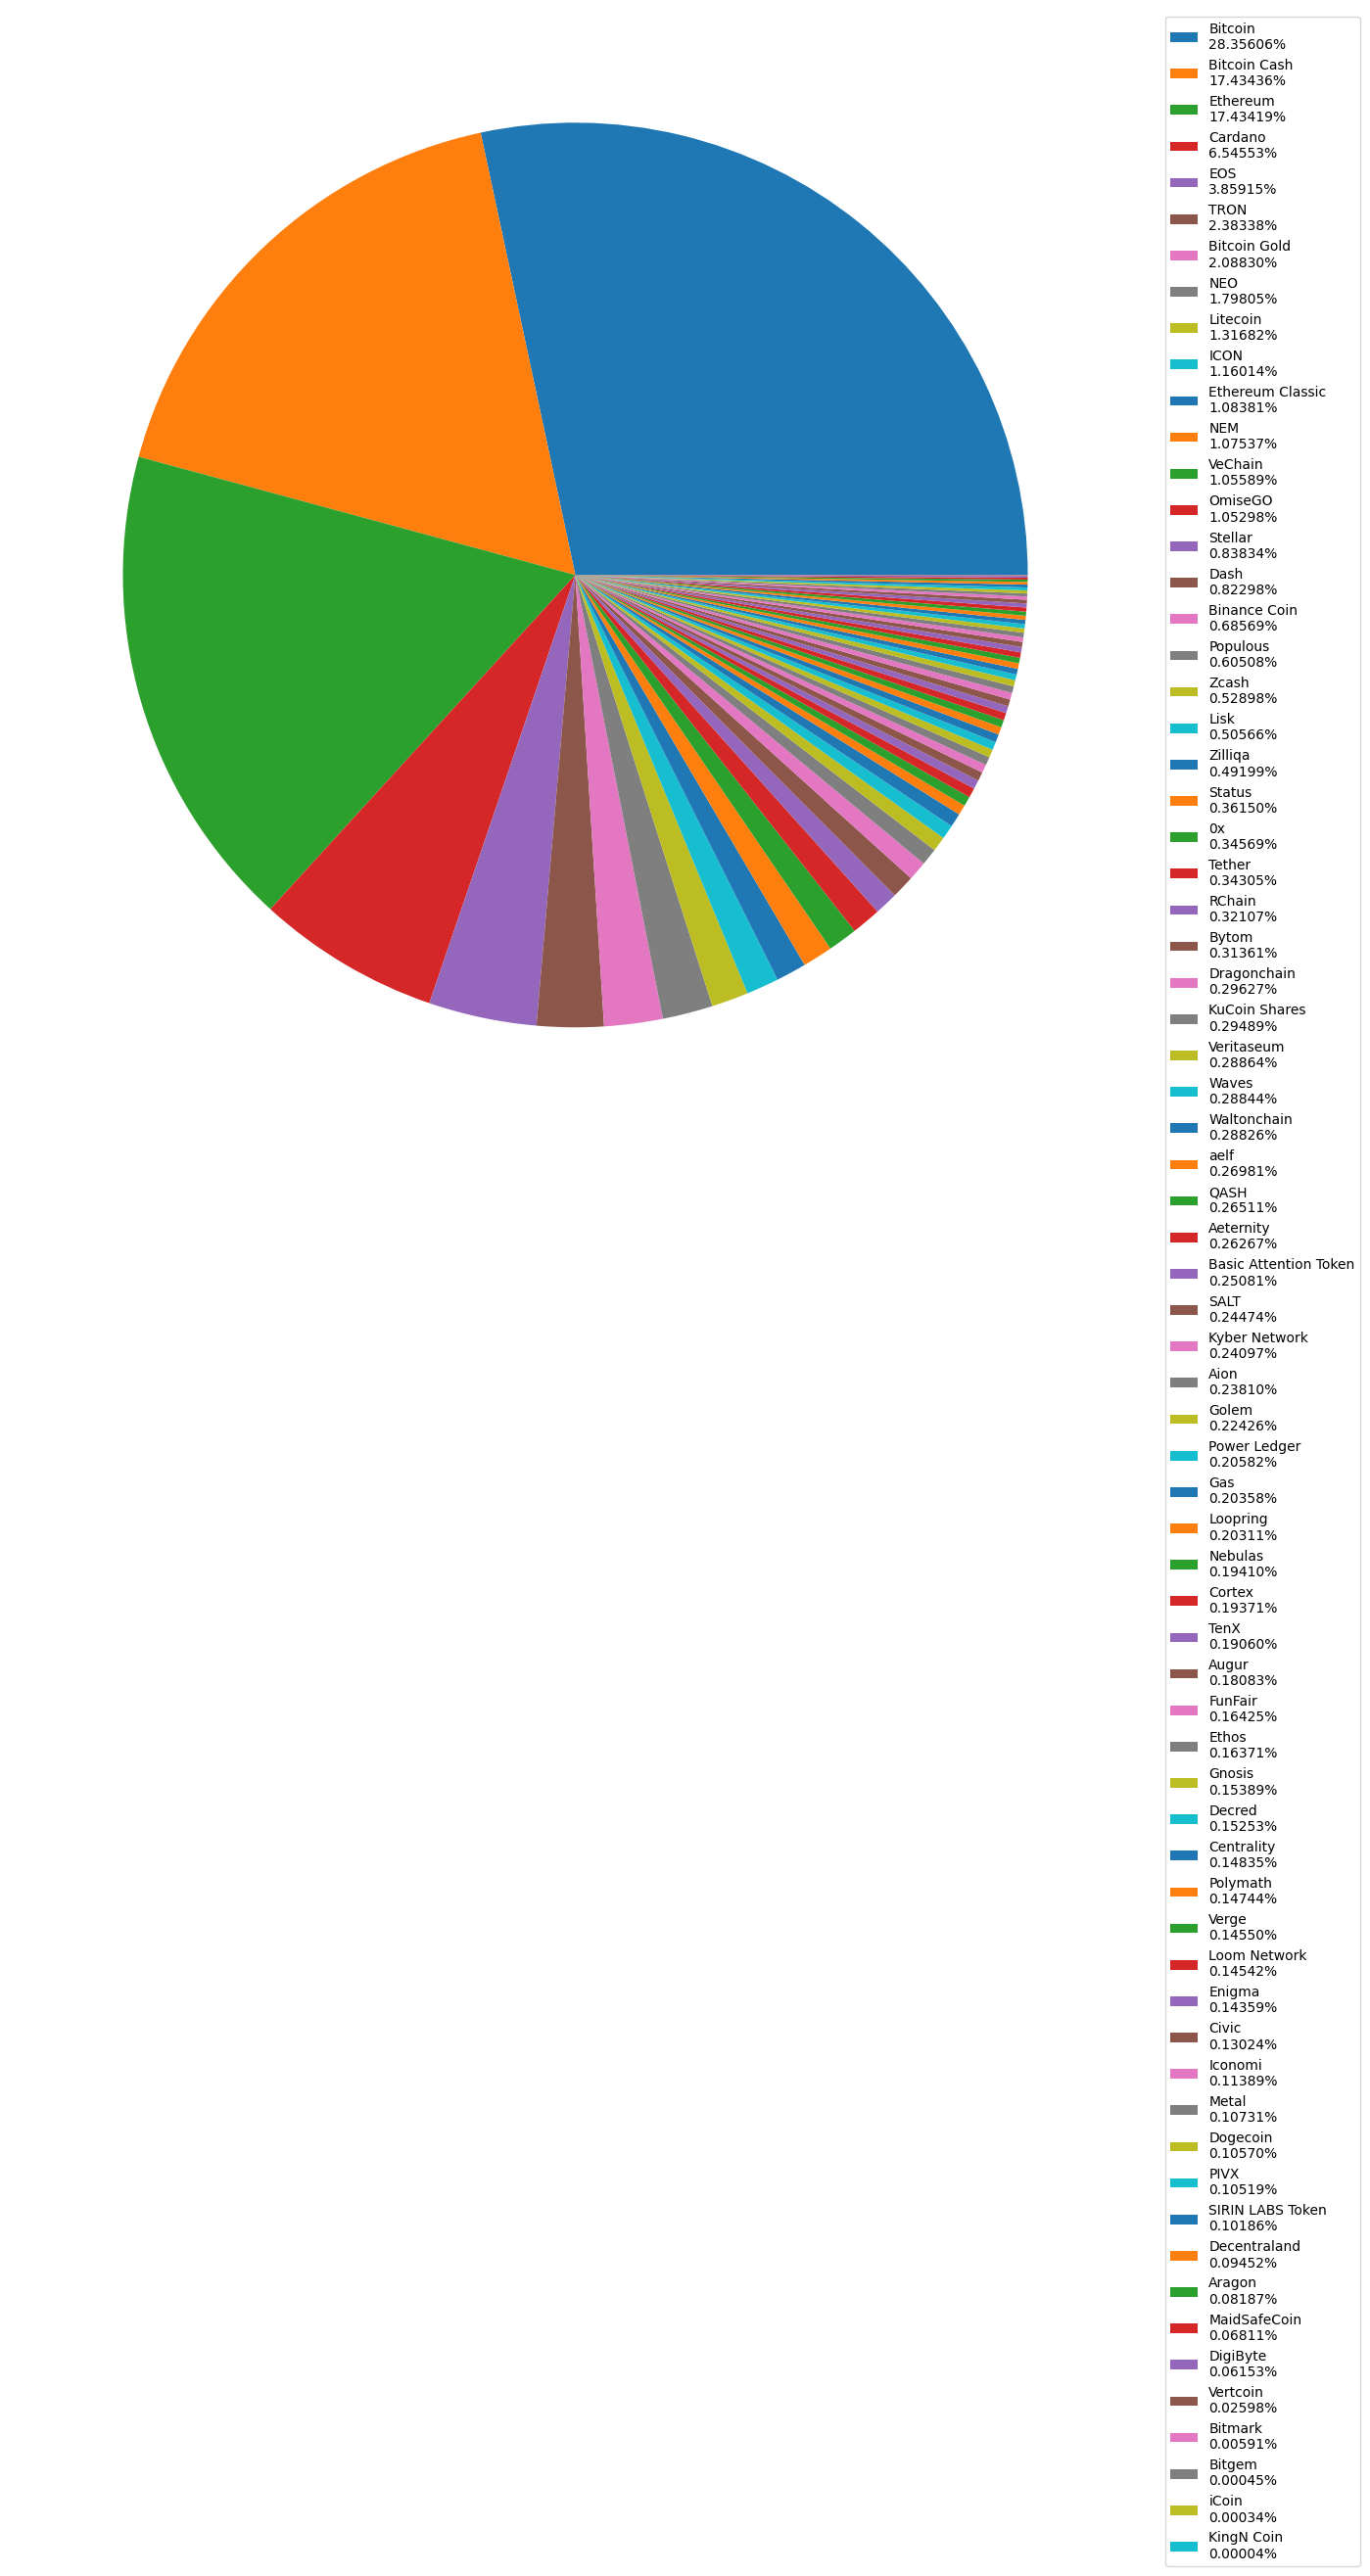

In [ ]:
av_market = coins.groupby('name')['market'].mean() #!!!!!
max_av_market_name = av_market.idxmax()
max_av_market = av_market.max()
min_av_market_name = av_market.idxmin()
min_av_market = av_market.min()
print(f'У {max_av_market_name} самая высокая средняя капитализация равная {max_av_market}.')
print(f'У {min_av_market_name} самая низкая средняя капитализация равная {min_av_market}.')

sum = av_market.sum()



av_market_sorted = av_market.sort_values(ascending=False)

labels = [f'{av_market_sorted.index[i]}\n{av_market_sorted[i]/sum * 100:.5f}%' for i in range(len(av_market_sorted))]

plot = av_market_sorted.plot.pie(figsize=(15, 15), legend=True, labeldistance=None, ylabel="", labels=labels)
plt.legend(loc="upper right" , bbox_to_anchor=(1.2, 1))
plt.show()



## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

def plot_fancy_price_action(coins, symbol, start_date, end_date):
  data = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]

  dates = mdates.date2num(data.index)
  open = data['open']
  high = data['high']
  low = data['low']
  close = data['close']

  fig, ax = plt.subplots(figsize=(20, 6)) # Увеличиваем размер изображения
  ax.plot(dates, open, label='Open')
  ax.plot(dates, high, label='High')
  ax.plot(dates, low, label='Low')
  ax.plot(dates, close, label='Close')

  ax.grid(True)

  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

  ax.set_xlabel('Дата')
  ax.set_ylabel('Цена')
  ax.set_title(f'Цены начала и конца продаж, а также минимальная и максимальная цена за день для {symbol}')
  ax.legend()

  plt.show()



Посмотрим, что получилось:

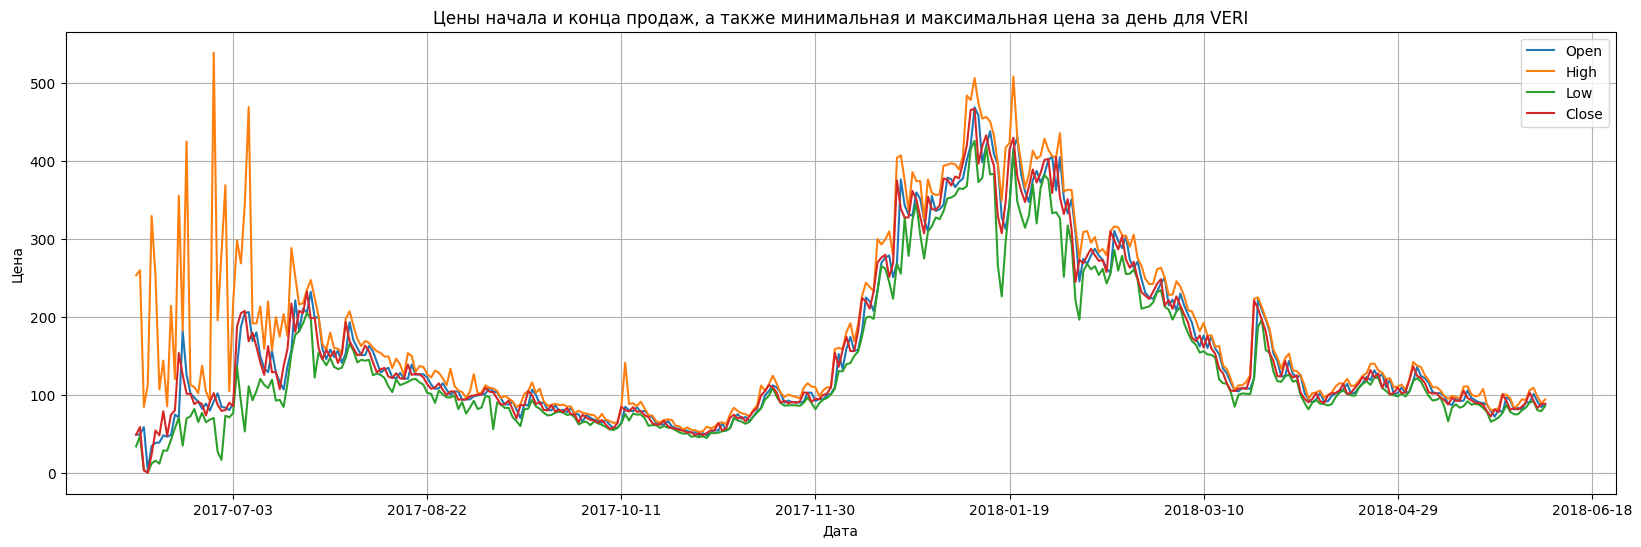

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]
    data = data.copy()
    data['pnd'] = data['high'] / data[['open', 'close']].max(axis=1)
    day = data['pnd'].idxmax()
    pnd = data.loc[day, 'pnd']
    print(f'У монеты {symbol} pnd был максимален и равен {pnd}. День: {day}.')

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

У монеты BTC pnd был максимален и равен 1.1428940004366206. День: 2017-11-29.


Сравните эти значения для разных монет:

In [ ]:
for element in set(coins['symbol']):
  find_most_severe_pump_and_dump(coins, symbol=element, start_date='2017-06-01', end_date='2018-06-01')

У монеты LOOM pnd был максимален и равен 1.5265126623868979. День: 2018-03-14.
У монеты USDT pnd был максимален и равен 1.099009900990099. День: 2017-11-12.
У монеты WAVES pnd был максимален и равен 1.2543352601156068. День: 2017-06-03.
У монеты LSK pnd был максимален и равен 1.4424778761061947. День: 2017-06-07.
У монеты KNC pnd был максимален и равен 1.8519240136385777. День: 2017-09-19.
У монеты ICX pnd был максимален и равен 1.2538461538461536. День: 2017-12-16.
У монеты SNT pnd был максимален и равен 1.3861630321910696. День: 2017-11-29.
У монеты ELF pnd был максимален и равен 1.2808988764044942. День: 2018-01-05.
У монеты MANA pnd был максимален и равен 2.9702777900454884. День: 2017-09-21.
У монеты BAT pnd был максимален и равен 1.2342492522991364. День: 2017-06-04.
У монеты FUN pnd был максимален и равен 12.490562327959102. День: 2017-06-29.
У монеты KCS pnd был максимален и равен 1.3243755975664018. День: 2017-10-25.
У монеты ZIL pnd был максимален и равен 1.4631857737419598. 

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    data = coins[start_date:start_date]
    data.set_index('symbol', inplace=True)
    start_investment = 0
    for symbol, amount in investments.items():
      start_investment += data.loc[[symbol]]["price"].item() * amount
    data = coins[end_date:end_date]
    data.set_index('symbol', inplace=True)
    end_investment = 0
    for symbol, amount in investments.items():
      end_investment += data.loc[[symbol]]["price"].item() * amount
    return (end_investment - start_investment) / start_investment


In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_bollinger_bands(coins, symbol, window, width):
  data = coins[coins["symbol"] == symbol]
  data["std"] = data["price"].rolling(window).std()
  data["mean"] = data["price"].rolling(window).mean()
  data["lower"] = data["mean"] - width*data["std"]
  data["higher"] = data["mean"] + width*data["std"]
  plot = data[["price", "lower", "higher"]].plot()
  plot.set_xlabel("Date")
  plot.set_ylabel("Price")
  plot.fill_between(data.index, data['lower'], data['higher'], alpha=0.1, facecolor="orange")

  # Set the x-axis date format and ticks
  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.gcf().autofmt_xdate()

  plt.show()


<ipython-input-50-5a9fa257b384>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["std"] = data["price"].rolling(window).std()
<ipython-input-50-5a9fa257b384>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["mean"] = data["price"].rolling(window).mean()
<ipython-input-50-5a9fa257b384>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

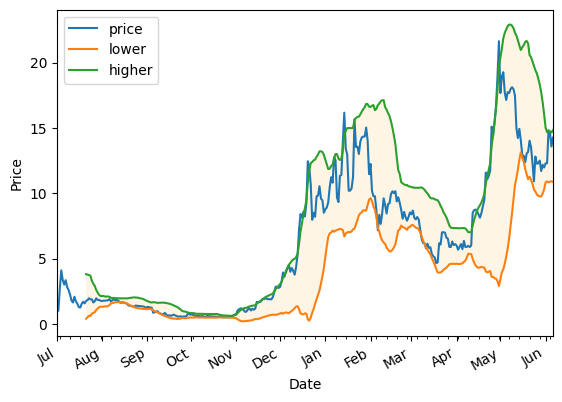

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Согласно графику правило Боллинджера выполняется.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
import matplotlib.pyplot as plt

def plot_coins_capitalizations(coins, symbols, start_date):
    data = coins[start_date:]
    market = data.groupby("date").sum()["market"]
    data["market_share"] = data["market"] / market
    ax = plt.axes()
    for symbol in symbols:
      data[data["symbol"] == symbol].plot(y="market", ax=ax, label=symbol, xlabel="Date", ylabel="Market Cap")
    plt.show()
    ax = plt.axes()
    for symbol in symbols:
      data[data["symbol"] == symbol].plot(y="market_share", ax=ax, label=symbol, xlabel="Date", ylabel="Market Share").legend(loc='upper right')
    plt.show()



<ipython-input-46-b84024e9fc4b>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  market = data.groupby("date").sum()["market"]
<ipython-input-46-b84024e9fc4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["market_share"] = data["market"] / market


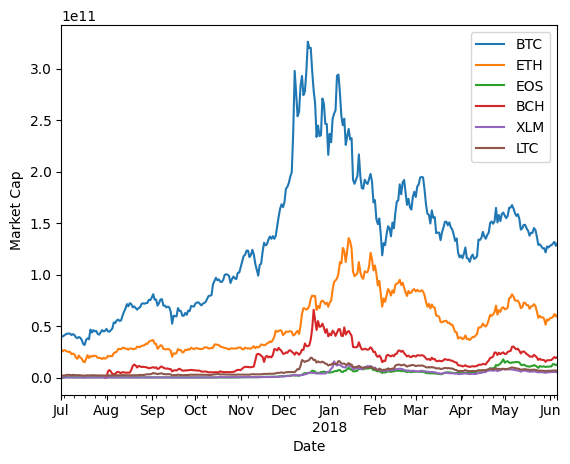

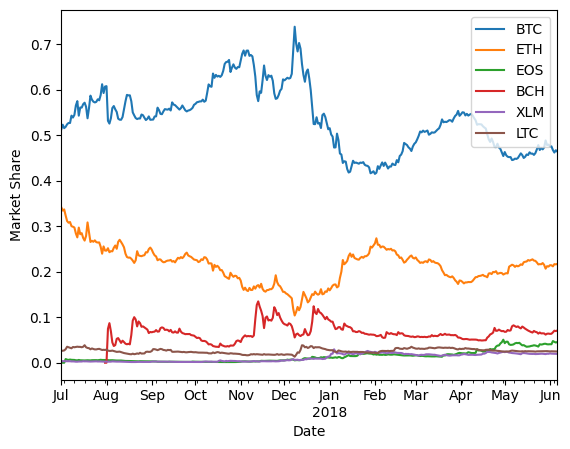

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Мы видим только падение доли биткойна, когда вырос эфир. Потому что эфир вырос, а биткоин нет. В целом можно увидеть тренд что цена альткойнов следует за ценой биткойна.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
import pandas as pd
import numpy as np

def calc_coins_correlations(coins, date, symbols, window, alpha):
   coins.index = pd.to_datetime(coins.index)
   data = coins[pd.Timestamp(date) + pd.DateOffset(-window):date]
   data = data[data["symbol"].isin(symbols)]
   data = data[["symbol", "price"]]
   means = {}
   for symbol in symbols:
      coin_data = list(data[data["symbol"] == symbol]["price"].ewm(alpha=alpha).mean())
      means[symbol] = coin_data
   return pd.DataFrame(means).corr()


In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06", symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'], window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-42-89cbd741b430>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,1.00,0.56,0.99,0.98,1.00,0.98
ETH,1.00,1.00,0.56,0.98,0.97,1.00,0.98
EOS,0.56,0.56,1.00,0.58,0.56,0.56,0.62
BCH,0.99,0.98,0.58,1.00,1.00,0.99,0.99
XLM,0.98,0.97,0.56,1.00,1.00,0.98,0.99
LTC,1.00,1.00,0.56,0.99,0.98,1.00,0.99
ADA,0.98,0.98,0.62,0.99,0.99,0.99,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-43-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.67,0.61,0.41,0.65,0.78,0.54
ETH,0.67,1.00,0.99,0.91,0.97,0.98,0.96
EOS,0.61,0.99,1.00,0.95,0.99,0.94,0.98
BCH,0.41,0.91,0.95,1.00,0.94,0.82,0.97
XLM,0.65,0.97,0.99,0.94,1.00,0.93,0.99
LTC,0.78,0.98,0.94,0.82,0.93,1.00,0.89
ADA,0.54,0.96,0.98,0.97,0.99,0.89,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

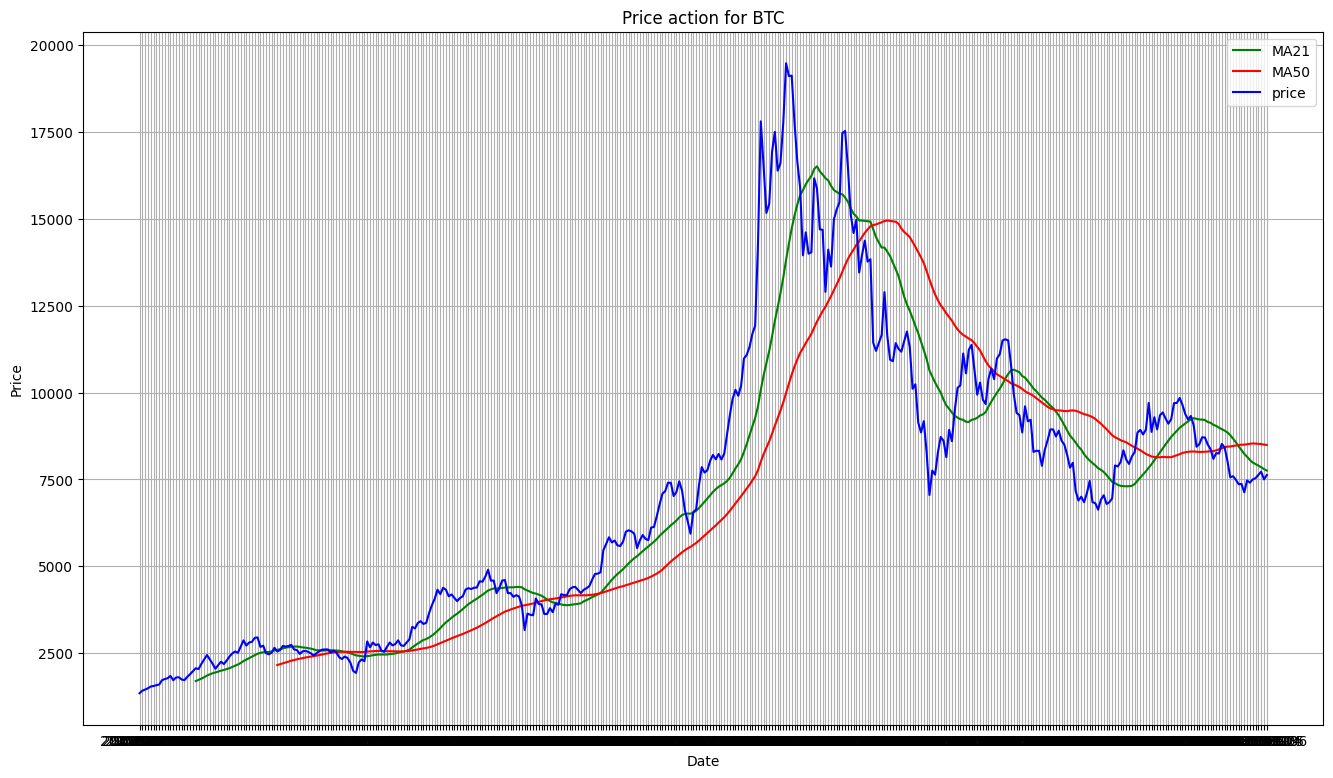

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):
    data = coins[coins["symbol"] == symbol][start_date:end_date]
    fig = plt.figure(figsize=(16, 9))
    plot_left = fig.add_subplot(1, 2, 1)
    plot_right = fig.add_subplot(1, 2, 2)
    data["close"].plot(ax=plot_right)
    data["lead"] = data["close"].rolling(lead_window).mean()
    data["lead"].plot(ax=plot_right)
    data["lag"] = data["close"].rolling(lag_window).mean()
    data["lag"].plot(ax=plot_right)
    data["multiplier"] = data["close"] / data["close"].shift(1)
    data["multiplier"].cumprod().plot(ax=plot_left)
    data["buy"] = (data["lead"] - data["lag"]) / data["close"] > threshold
    data["sell"] = (data["lag"] - data["lead"]) / data["close"] > threshold
    prev_bought = True
    def true_func():
      prev_bought = True
      return True
    def false_func():
      prev_bought = False
      return False
    data["bought"] = np.where(data["buy"], true_func(), np.where(data["sell"], false_func(), prev_bought))
    data["moving_avrage_multiplier"] = np.where(data["bought"], data["multiplier"], 1)
    data["moving_avrage_multiplier"].cumprod().plot(ax=plot_left)
    plt.show()

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

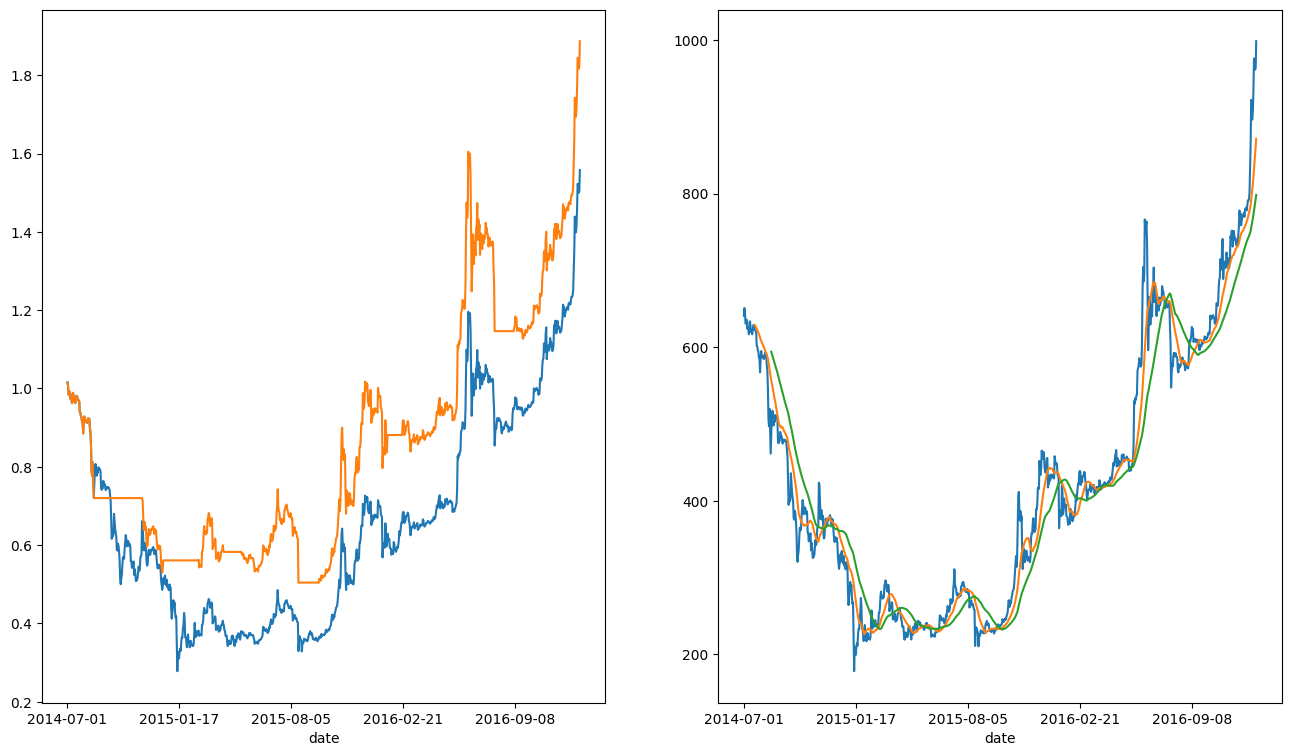

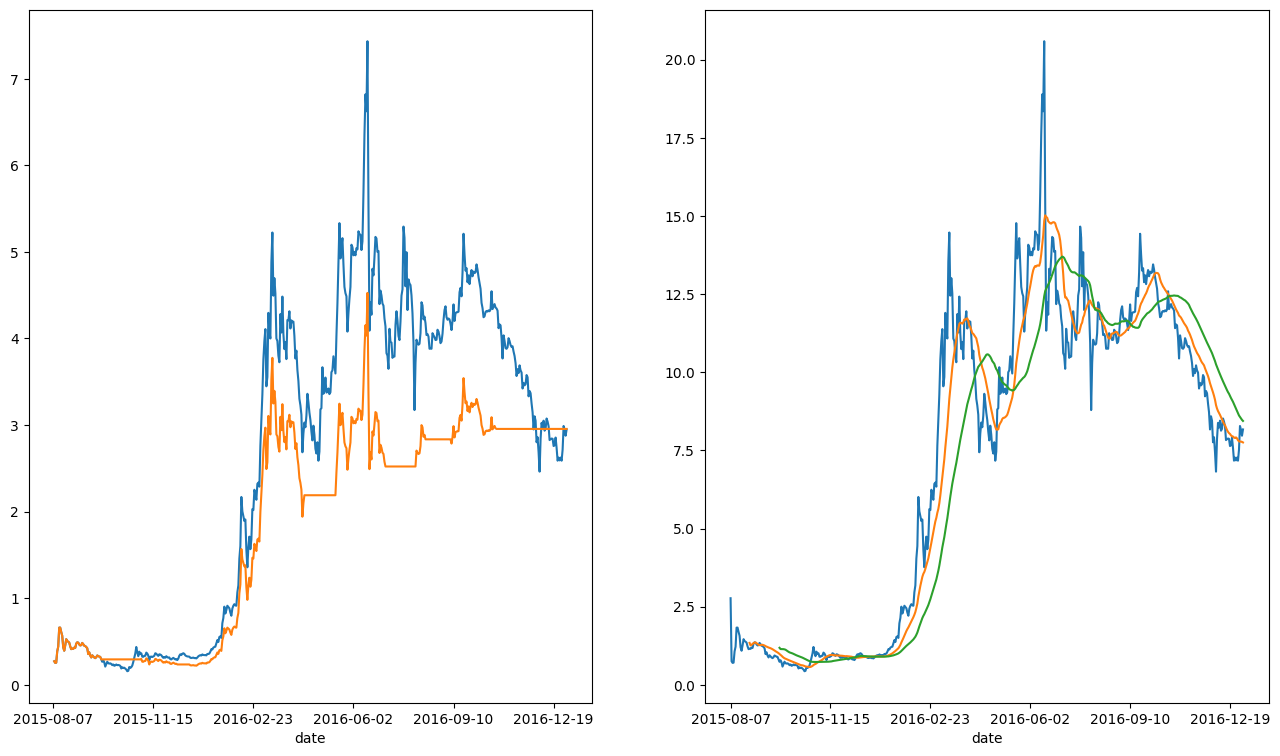

In [ ]:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)
plot_moving_averages_strategy(coins, 'BTC', 20, 50, 0.03, '2014-07-01', '2017-01-01')
plot_moving_averages_strategy(coins, 'ETH', 20, 50, 0.02, '2015-07-01', '2017-01-01')

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:


**Ваш ответ тут**
Эта модель более стабильна чем стандартная инвестиционная, что позволяет уменьшить потери при падении, но уменьшить доходы при росте. Эта модель вполне применима.

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.